# День 1

### https://adventofcode.com/2021/day/1

# Part 1

Имеется список целых чисел. Требуется найти количество событий, где последующий элемент больше предыдущего.

Пример входных данных:
```
199
200
208
210
200
207
240
269
260
263
```

Результат:
```
7
```

In [62]:
# Шаг 1: получить данные задачи

arr = []
with open("input.txt") as f:
    for line in f:
        arr.append(int(line))
        
print(arr)

# Шаг 2: просто проходимся по элементам
answer = 0
for c_val, n_val in zip(arr[:-1], arr[1:]):
    if n_val > c_val:
        answer += 1
        
# Шаг 3: вывод
print(answer)  
with open("output1.txt", "w") as f:
    print(answer, file=f)
    # можно и так
    # f.write(str(answer))

[199, 200, 208, 210, 200, 207, 240, 269, 260, 263]
7


In [63]:
arr = []
with open("input.txt") as f:
    for line in f:
        arr.append(int(line))
        
print(arr)

answer = 0
for c_val, n_val in zip(arr[:-1], arr[1:]):
    if n_val > c_val:
        answer += 1
                        
print(answer)
    
with open("output1.txt", "w") as f:
    #f.write(str(answer))
    print(answer, file=f)

[199, 200, 208, 210, 200, 207, 240, 269, 260, 263]
7


# Part 2

Имеется тот же самый список, но теперь по списку скользит окно ширинной 3. Теперь нужно найти количество событий, где сумма элементов в следующем окне больше суммы элементов в предыдущем.

In [64]:
# Шаг 1: получить данные задачи

arr = []
with open("input.txt") as f:
    for line in f:
        arr.append(int(line))
    
print(arr)

# Шаг 2: просто берем срезы, они и есть наши окна
answer = 0
for i in range(len(arr) - 3):
    a = sum(arr[i:i+3])
    b = sum(arr[i+1:i+3+1])
    print(a, b)
    if b > a:
        answer += 1
        
# Шаг 3: вывод
print(answer)
with open("output2.txt", "w") as f:
    #f.write(str(answer))
    print(answer, file=f)

[199, 200, 208, 210, 200, 207, 240, 269, 260, 263]
607 618
618 618
618 617
617 647
647 716
716 769
769 792
5


Можно оценить количество операций в алгоритме выше в зависимости от длины входных данных. По времени - это будет $O(7(n-3)) \equiv O(n)$, по памяти - это будет $O(n)$, так как нам нужно хранить только ответ и сам массив.

# Part 2 (лучше)

Но мы можем сделать наш алгоритм еще лучше.

In [65]:
# Шаг 1: получить данные задачи

arr = []
with open("input.txt") as f:
    for line in f:
        arr.append(int(line))
    
print(arr)

# Шаг 2: мы вычисляем следующее окно из текущего.
#        Это позволяет не делать два цикла для вычисления окна.
#        
answer = 0

# инициализация окна
window = arr[0] + arr[1] + arr[2]

# проходимся по элементам, обновляя состояния окна
for i in range(3, len(arr)):
    # запоминаем предыдущее
    a = window
    # а теперь обновляем
    window = window - arr[i-3] + arr[i]
    
    if window > a:
        answer += 1
    
# Шаг 3: вывод
print(answer) 
with open("output2.txt", "w") as f:
    #f.write(str(answer))
    print(answer, file=f)

[199, 200, 208, 210, 200, 207, 240, 269, 260, 263]
5


Сложность по времени данного алгоритма станет - $O(3(n-3)+2) \equiv O(n)$. Асимптотическая сложность не изменилась, но количество операций стало в два раза меньше. На очень больших объемах данных - это существенно. 

# Part 2 (еще лучше)

Можно еще лучше. Когда мы сравниваем два окна, то по факту у нас есть выражение:
$$
a[n] + a[n+1] + a[n+2] < a[n+1] + a[n+2] + a[n+3]
$$

Если убрать одинаковые элементы, то получим
$$
a[n] < a[n+3]
$$

Таким образом, для сравнения окон, нам достаточно сравнить первый элемент первого окна и последний элемент второго.

In [70]:
# Здесь все сложнее. Мы последовательно считываем данные
# из файла и сравниваем элементы из окон.

queue = []
answer = 0

with open("input.txt") as f:
    for _ in range(3):
        line = f.readline()
        queue.append(int(line))
    
    for line in f:
        first = queue.pop(0)
        queue.append(int(line))
        last = queue[-1]
        
        if last > first:
            answer += 1
            
            
#  вывод
print(answer) 
with open("output2.txt", "w") as f:
    #f.write(str(answer))
    print(answer, file=f)

5


Здесь уже сложность алгоритма такая же $O(3*(n-3) + 2)$, но сложность по памяти становится функцией ширины окна $O(m)$, где $m$ - ширина окна.

# Сравнение

In [99]:
import timeit

def func1(arr):
    answer = 0
    for i in range(len(arr) - 3):
        a = sum(arr[i:i+3])
        b = sum(arr[i+1:i+3+1])
        if b > a:
            answer += 1
    return answer

def func2(arr):
    answer = 0
    
    for i in range(0, len(arr) - 3):
        first = arr[i]
        last = arr[i + 3]
        if last > first:
            answer += 1
            
    return answer 

Ns = list(range(10, 100))

t1 = []
for n in Ns:
    arr = [i for i in range(n)]
    r = timeit.timeit('func1(arr)', globals=globals(), number=5000)
    t1.append(r)
    
t2 = []
for n in Ns:
    arr = [i for i in range(n)]
   
    r = timeit.timeit('func2(arr)', globals=globals(), number=5000)
    t2.append(r)

In [100]:
import matplotlib.pyplot as plt

%matplotlib inline

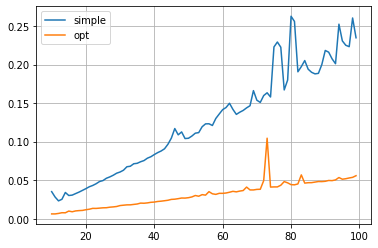

In [101]:
plt.plot(Ns, t1, label="simple")
plt.plot(Ns, t2, label="opt")
plt.grid()
plt.legend()
plt.show()